# Red Wine Quality Analysis

### Table of Contents

* [Introduction](#introduction)
* [Explore Data](#exploredata)
* [Classification](#classification)
* [Prepare Data for Modeling](#preparedata)
* [Modeling](#modeling)
* [Bonus: Will the models work for white wine?](#bonus)


## Introduction<a class="anchor" id="introduction"></a>

### Red Wine Quality Data

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).



#### Citation
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
 

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

### Features

The features included are as follows:
* Fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

* Volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

* Citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

* Residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

* Chlorides: the amount of salt in the wine

* Free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

* Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

* Density: the density of water is close to that of water depending on the percent alcohol and sugar content

* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

* Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

* Alcohol: the percent alcohol content of the wine

* Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

### Purpose

The purpose of this project is two-fold:

* Create model(s) to accurately predict red wine quality based on the features listed above.
* Will the same model(s) accurate predict white wine quality?

## Explore data <a class="anchor" id="exploredata"></a>

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Import dataframe
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
# View column titles and first five rows of data
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Verify dataset has no null values and datatypes are appropriate
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Confirm there are no null values
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# View basic statistics of each variable
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# View the quality ratings in dataset
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
# View distribution of quality ratings
df_red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

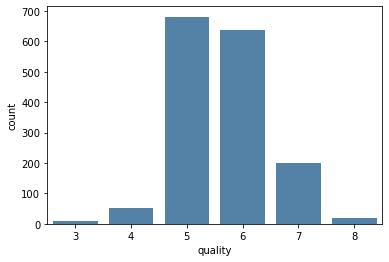

In [9]:
# Visualize distribution of quality ratings
sb.countplot(data=df_red, x='quality', color='steelblue');

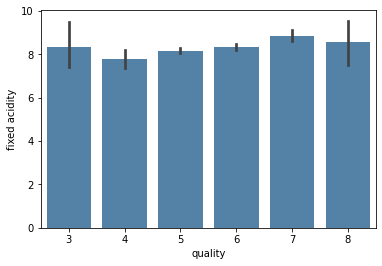

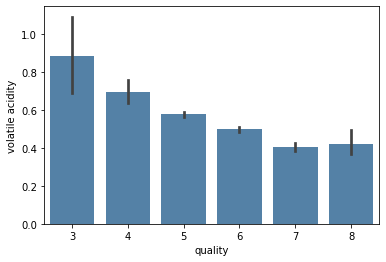

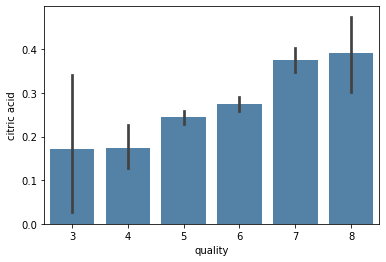

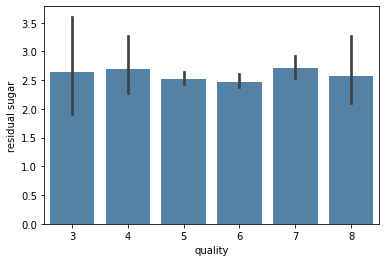

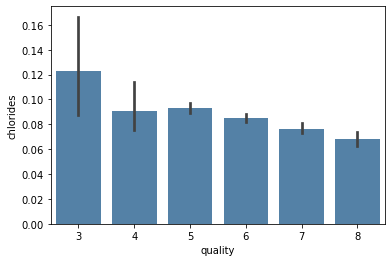

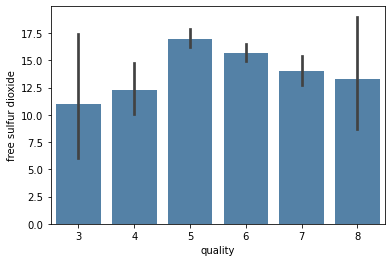

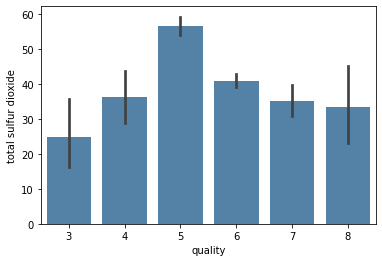

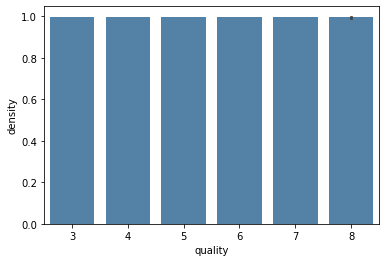

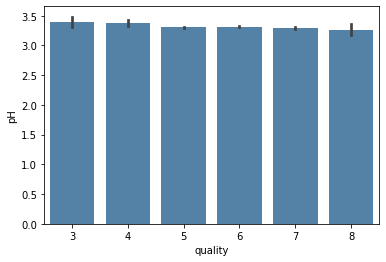

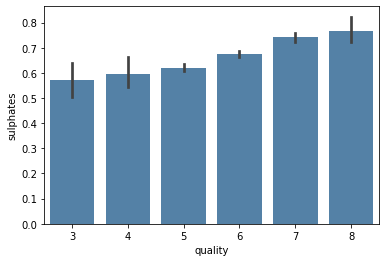

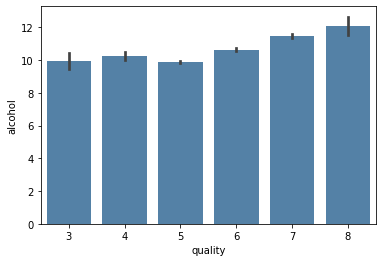

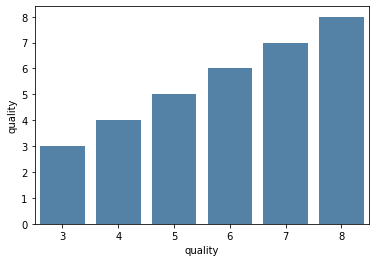

In [10]:
# Visualize relationships between each variable and quality
df_sub = df_red.select_dtypes([int,float])

for i, col in enumerate(df_sub.columns):
    plt.figure(i)
    sb.barplot(data=df_sub, x='quality', y=col, color='steelblue')

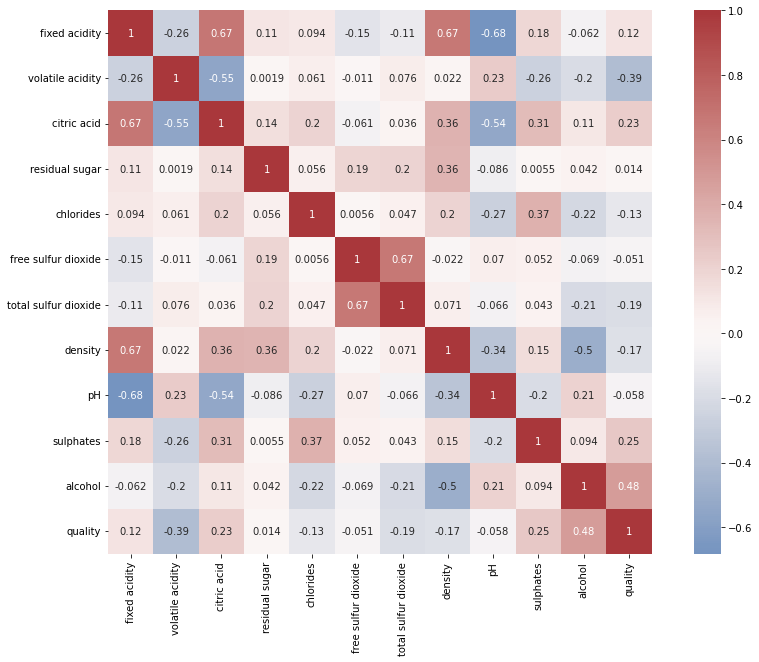

In [12]:
# Create correlation matrix
plt.figure(figsize=(15,10))
sb.heatmap(df_red.corr(), cmap='vlag', annot=True, center=0, square=True);

#### Conclusion & Next Steps

As seen in both the barplots and the correlation matrix, there are several features that have moderate correlations with the quality of the red wine. 

Alcohol appears to have the strongest positive correlation on red wine quality-- the higher level of alcohol, the higher perceived wine quality. The amount of sulphates and citric acid also have moderately strong postive correlations with quality.

Volatile acidity and total sulfur dioxide have moderate negative correlations with quality-- the lower levels of both, the higer the perceived wine quality.

We can also note that total sulfur dioxide and free sulfur dioxide have a strong positive correlation, as could be expected.


## Classification <a class="anchor" id="classification"></a>

In order to predict wine quality, we must decide what is high vs. low quality for the wines. The median quality rating is 6 so I decided to differentiate high quality wine as the wines with quality ratings above 6. 

In [13]:
df_red['high_quality'] = [1 if x > 6 else 0 for x in df_red['quality']]

In [3]:
df_red.high_quality.value_counts()

NameError: name 'df_red' is not defined

## Prepare data for modeling <a class="anchor" id="preparedata"></a>

In order to assess the model accuracy, I split the data into training and testing groups with 20% of the data being reserved to test model accuracy. 

Additionally, I used sklearn to standardize the feature variables.

In [1]:
# Set variables
X = df_red.drop(['quality', 'high_quality'], axis=1)
Y = df_red.high_quality

NameError: name 'df_red' is not defined

In [2]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

NameError: name 'X' is not defined

In [18]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Modeling <a class="anchor" id="modeling"></a>

First I created a logistic regression model. Then I decided to see if a decision tree would be more accurate.

In [19]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
log.fit(X_train, y_train);

In [20]:
# Assess accuracy of logistic regression model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_log = log.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print('Logistic regression accuracy: {}'.format(accuracy_score(y_test, y_pred_log)))

[[271  19]
 [ 18  12]]
Logistic regression accuracy: 0.884375


In [21]:
# Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train);

In [22]:
# Assess accuracy of decision tree algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


y_pred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print('Decision tree accuracy: {}'.format(accuracy_score(y_test, y_pred_tree)))


[[270  20]
 [ 11  19]]
Decision tree accuracy: 0.903125


#### Conclusion: Can we use these models to predict the quality of red wine?

The decision tree was more accurate with an accuracy score of 0.903125, but both models are fairly accurate at predicting red wine quality.

## Bonus: Can our models predict the quality of white wine? <a class="anchor" id="bonus"></a>

Additionally, I decided to see if the models could predict quality of white wine. I was curious if the same features are associated with high quality wines for white wine as well.

In [4]:
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

df_white['high_quality'] = [1 if x > 6 else 0 for x in df_white['quality']]
X_white = df_white.drop(['quality', 'high_quality'], axis = 1)
X_white = StandardScaler().fit_transform(X_white)
y_white = df_white.high_quality

NameError: name 'pd' is not defined

In [24]:
white_pred_log = log.predict(X_white)
print(confusion_matrix(y_white, white_pred_log))
print('Logistic regression accuracy for white wine: {}'.format(accuracy_score(y_white, white_pred_log)))

[[3736  102]
 [ 952  108]]
Logistic regression accuracy for white wine: 0.7848101265822784


In [25]:
white_pred_tree = tree.predict(X_white)
print(confusion_matrix(y_white, white_pred_tree))
print('Decision tree accuracy for white wine: {}'.format(accuracy_score(y_white, white_pred_tree)))

[[3472  366]
 [ 891  169]]
Decision tree accuracy for white wine: 0.7433646386280114


#### Conclusion: Can we use these models to predict the quality of white wine?

The models were less accurate with the white wine data set; however, an accuracy score of 0.784810 for the logistic regression model was more impressive than expected.

The features that predict quality in red wine therefore are not entirely different from the features that predict quality in white wine. It would be an interesting analysis in the future to determine which features were most important for each and how those differ.